In [1]:
import networkx as nx
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from pykeen.models import predict
import json


In [8]:
from pykeen.hpo import hpo_pipeline
import os
NATIONS_TRAIN_PATH = "397d8cae76d1c0a7.tsv"
NATIONS_TEST_PATH = "944c8368543f21fb.tsv"
NATIONS_VALIDATE_PATH = "f78363e3cc31c563.tsv"

pipeline_result = pipeline(
#     n_trials=3,  # you probably want more than this
    training=NATIONS_TRAIN_PATH,
    testing=NATIONS_TEST_PATH,
    validation=NATIONS_VALIDATE_PATH,
    model='TransE',
    epochs=5,  # short epochs for testing - you should go higher
)
pipeline_result.save_to_directory(os.getcwd()+'/prova_deathstarbench')

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/28.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=34, num_relations=20, create_inverse_triples=False, num_triples=33, path="C:\Users\gianl\OneDrive - Politecnico di Milano\Master Thesis\prove\deathstarbench_traces\397d8cae76d1c0a7.tsv") to file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/prove/deathstarbench_traces/prova_deathstarbench/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/prove/deathstarbench_traces/prova_deathstarbench


In [3]:
# pipeline_result = pipeline(
#     dataset='Nations',
#     model='TransE',
# )
# pipeline_result.save_to_directory('/nations_transe')


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

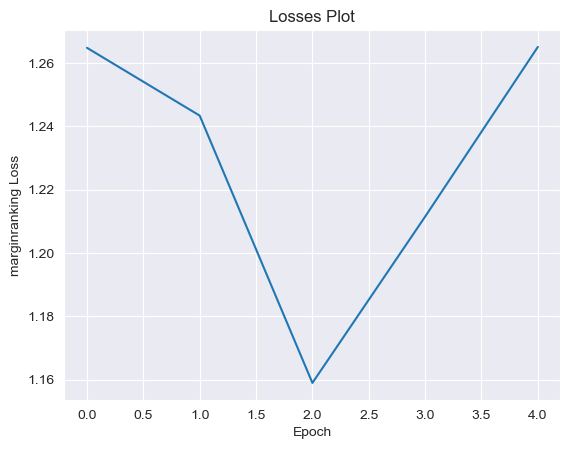

In [4]:
pipeline_result.plot_losses()

AttributeError: 'TransE' object has no attribute 'entity_embeddings'

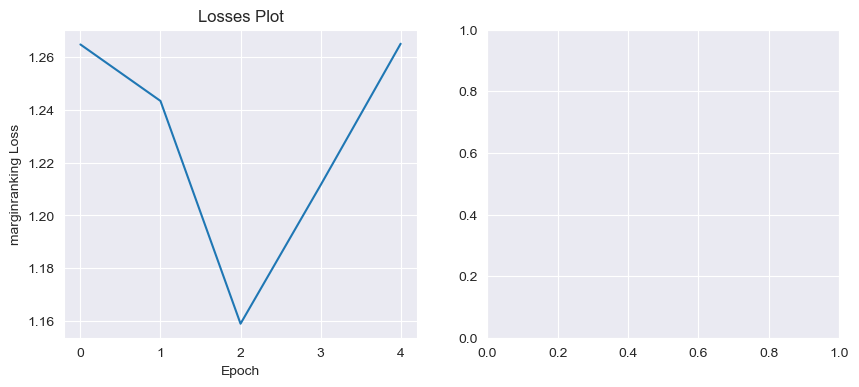

In [5]:
pipeline_result.plot()

In [ ]:
model = pipeline_result.model
# Predict tails
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label=1, relation_label=10, triples_factory=pipeline_result.training,
)
# Predict relations
predicted_relations_df = predict.get_prediction_df(
    model=model, head_label="brazil", tail_label="uk", triples_factory=pipeline_result.training,
)
# Predict heads
predicted_heads_df = predict.get_prediction_df(
    model=model, relation_label="conferences", tail_label="brazil", triples_factory=pipeline_result.training
)
predicted_tails_df

In [ ]:
# Score all triples (memory intensive)
predictions_df = predict.get_all_prediction_df(model, triples_factory=pipeline_result.training)

In [ ]:
# Score top K triples (computationally expensive)
top_k_predictions_df = predict.get_all_prediction_df(model, k=150, triples_factory=pipeline_result.training)

In [ ]:
# Score a given list of triples
score_df = predict.predict_triples_df(
    model=model,
    triples=[("brazil", "conferences", "uk"), ("brazil", "intergovorgs", "uk")],
    triples_factory=pipeline_result.training,
)
score_df

In [ ]:
from pykeen.evaluation import evaluate, ClassificationEvaluator

In [ ]:
results = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,evaluator = ClassificationEvaluator(),mode=None,additional_filter_triples=[pipeline_result.training.mapped_triples])

In [ ]:
results.to_dict()

In [ ]:
Nations().summarize()

In [ ]:
nations_dataset = get_dataset(dataset='nations')
nations_training = nations_dataset.training
triples = nations_training.mapped_triples
triples_list = triples.tolist() # head, relation type, tail
pairs = list(map(lambda x: [x[0],x[2]],triples_list))
pairs

In [ ]:
# Create a graph object
G = nx.Graph()

# Add the edges from the PyKEEN dataset
G.add_edges_from(pairs)

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G)

# Import matplotlib library to show the graph
plt.show()


In [ ]:
# Create a graph object
G = nx.Graph()

# Add the edges from the PyKEEN dataset
for triplet in triples_list:
    G.add_edge(triplet[0], triplet[2], label=triplet[1])

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'))

# Import matplotlib library to show the graph
plt.show()


In [ ]:
cmap = mpl.cm.nipy_spectral
norm = mpl.colors.Normalize(vmin=1, vmax=55)

# Create a graph object
G = nx.Graph()

# Add the edges from the PyKEEN dataset
for triplet in triples_list:
    G.add_edge(triplet[0], triplet[2], color=cmap(norm(triplet[1])))
    
colors = nx.get_edge_attributes(G,'color').values()

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G,edge_color = colors)


# Import matplotlib library to show the graph
plt.show()


In [ ]:
triples_factory = Nations().training
entity_ids = torch.as_tensor(triples_factory.entities_to_ids(["china", "egypt"]))
relation_ids = torch.as_tensor(triples_factory.relations_to_ids(["independence", "embassy"]))

In [ ]:
relation_ids